In [1]:
## Breast Cancer Classification : Determine if the cells are benign or malignant
## Problem Overview and Background
## Fine Needle Aspirate (FNA) process extracts the cell from the subject
## Then With high resolution microscope the images of those cells are taken.
## We extract features from this images which are then feeded into ML Algorithms for classification

In [2]:
## Input has 30 Features (Example: Radius, Texture, Perimeter,etc)
## Data can be obtained from UCI Repository

In [3]:
## 569 Instances
## 212 Malignant
## 357 Benign

## ML model applied here is Support Vector Machines (Read through to know the reason why?)
## This Algorithms uses boundary points (points from different classes with similar features ) for classification boundaries

In [4]:
## Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
## Load the data
## Dataset can be obtained from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

data=pd.read_csv("data.csv")

In [6]:
## Attributes are:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
## Lets first check whether the classes are linearly seperable

## I have used clustering method to test whether you classes are linearly seperable. You are free to choice your way.

In [8]:
from sklearn.cluster import KMeans
import sklearn
x=data.drop(["id","diagnosis"],axis=1)
dummy=pd.get_dummies(data["diagnosis"])
dummy=dummy.drop(["B"],axis=1)

In [9]:
### Kmeans Clustering: Checking Cluster Purity
kmeans=KMeans(n_clusters=2,random_state=0).fit(x)
kmeans.labels=pd.DataFrame(kmeans.labels_)
results=pd.concat([kmeans.labels,dummy],axis=1)

In [10]:
cm=sklearn.metrics.confusion_matrix(results[0],results['M'])
print("Confusion Matrix:")
print(cm)
cluster_purity=(356+130)/(356+82+1+130)
print("The Cluster Purity is: " +str(cluster_purity))

Confusion Matrix:
[[356  82]
 [  1 130]]
The Cluster Purity is: 0.8541300527240774


In [11]:
## Here the cluster purity is appreciable, which implies that the classes are linearly seperable
## We can go with Support Vector Machines or Logistic Regression ## Lets go with Support Vector Machines

In [12]:
## Data Scaling: Normalization
x=(x-x.min())/(x-x.min()).max()

In [13]:
x=x.join(dummy)

In [14]:
## M attribute states if the cells are malignant. if M==1, Malignant; Benign otherwise

In [15]:
### Data Visualization
x.iloc[:,:-1]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
5       0.258839      0.202570        0.267984   0.141506         0.678613   
6       0.533343      0.347311        0.523875   0.380276         0.379164   
7       0.318472      0.376057        0.320710   0.184263         0.598267   
8       0.284869      0.409537        0.302052   0.159618         0.674099   
9       0.259312      0.484613        0.277659   0.140997         0.595558   
10      0.427801      0.457558        0.407090   0.277540         0.265686   
11      0.416442      0.276632        0.413309   0.270414         0.401462   
12      0.576885      0.510315        0.612328   0.415483         0.404171   
13      0.419755      0.481569        0.414000   0.271135         0.283290   
14      0.319419      0.436253        0.344206   0.184433         0.545906   
15      0.357755      0.602976        0.365835   0.218579         0.553128   
16      0.364381      0.352384        0.352083   0.229480         0.415636   
17      0.433007      0.370984        0.444406   0.277964         0.581114   
18      0.607175      0.420697        0.595743   0.473595         0.412386   
19      0.310426      0.157254        0.301776   0.179343         0.407692   
20      0.288655      0.202908        0.289130   0.159703         0.495351   
21      0.119409      0.092323        0.114367   0.055313         0.449309   
22      0.395617      0.153872        0.405708   0.237922         0.493545   
23      0.671068      0.450795        0.645498   0.534677         0.376004   
24      0.457617      0.394657        0.457536   0.322842         0.536878   
25      0.480808      0.226243        0.498998   0.326278         0.595558   
26      0.359648      0.399729        0.370534   0.212641         0.476393   
27      0.550381      0.356442        0.541151   0.403181         0.377088   
28      0.393724      0.526209        0.405017   0.249799         0.501670   
29      0.501160      0.180588        0.492088   0.344263         0.413830   
..           ...           ...             ...        ...              ...   
539     0.033603      0.531958        0.031442   0.011410         0.307394   
540     0.215770      0.159959        0.213254   0.110032         0.426198   
541     0.354442      0.516740        0.359478   0.217561         0.322651   
542     0.367220      0.531282        0.351807   0.222736         0.271915   
543     0.294808      0.620561        0.283947   0.167508         0.307665   
544     0.326045      0.371660        0.317739   0.187190         0.389546   
545     0.314213      0.457220        0.299910   0.182269         0.359574   
546     0.158029      0.224552        0.148711   0.076946         0.376546   
547     0.155190      0.232330        0.152443   0.075207         0.326262   
548     0.127881      0.325668        0.119273   0.060318         0.291415   
549     0.181693      0.490362        0.173450   0.092513         0.264422   
550     0.183587      0.398039        0.170824   0.092047         0.195721   
551     0.196365      0.430504        0.191417   0.099639         0.388463   
552     0.273984      0.666892        0.259554   0.154571         0.272005   
553     0.111316      0.413595        0.105176   0.051113         0.359032   
554     0.279190      0.649645        0.267501   0.157285         0.258193   
555     0.156609      0.605343        0.151199   0.075461         0.340074   
556     0.150457      0.334122        0.144703   0.071347         0.430351   
557     0.115576      0.614474        0.106903   0.054210         0.258193   
558     0.360121      0.438

C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


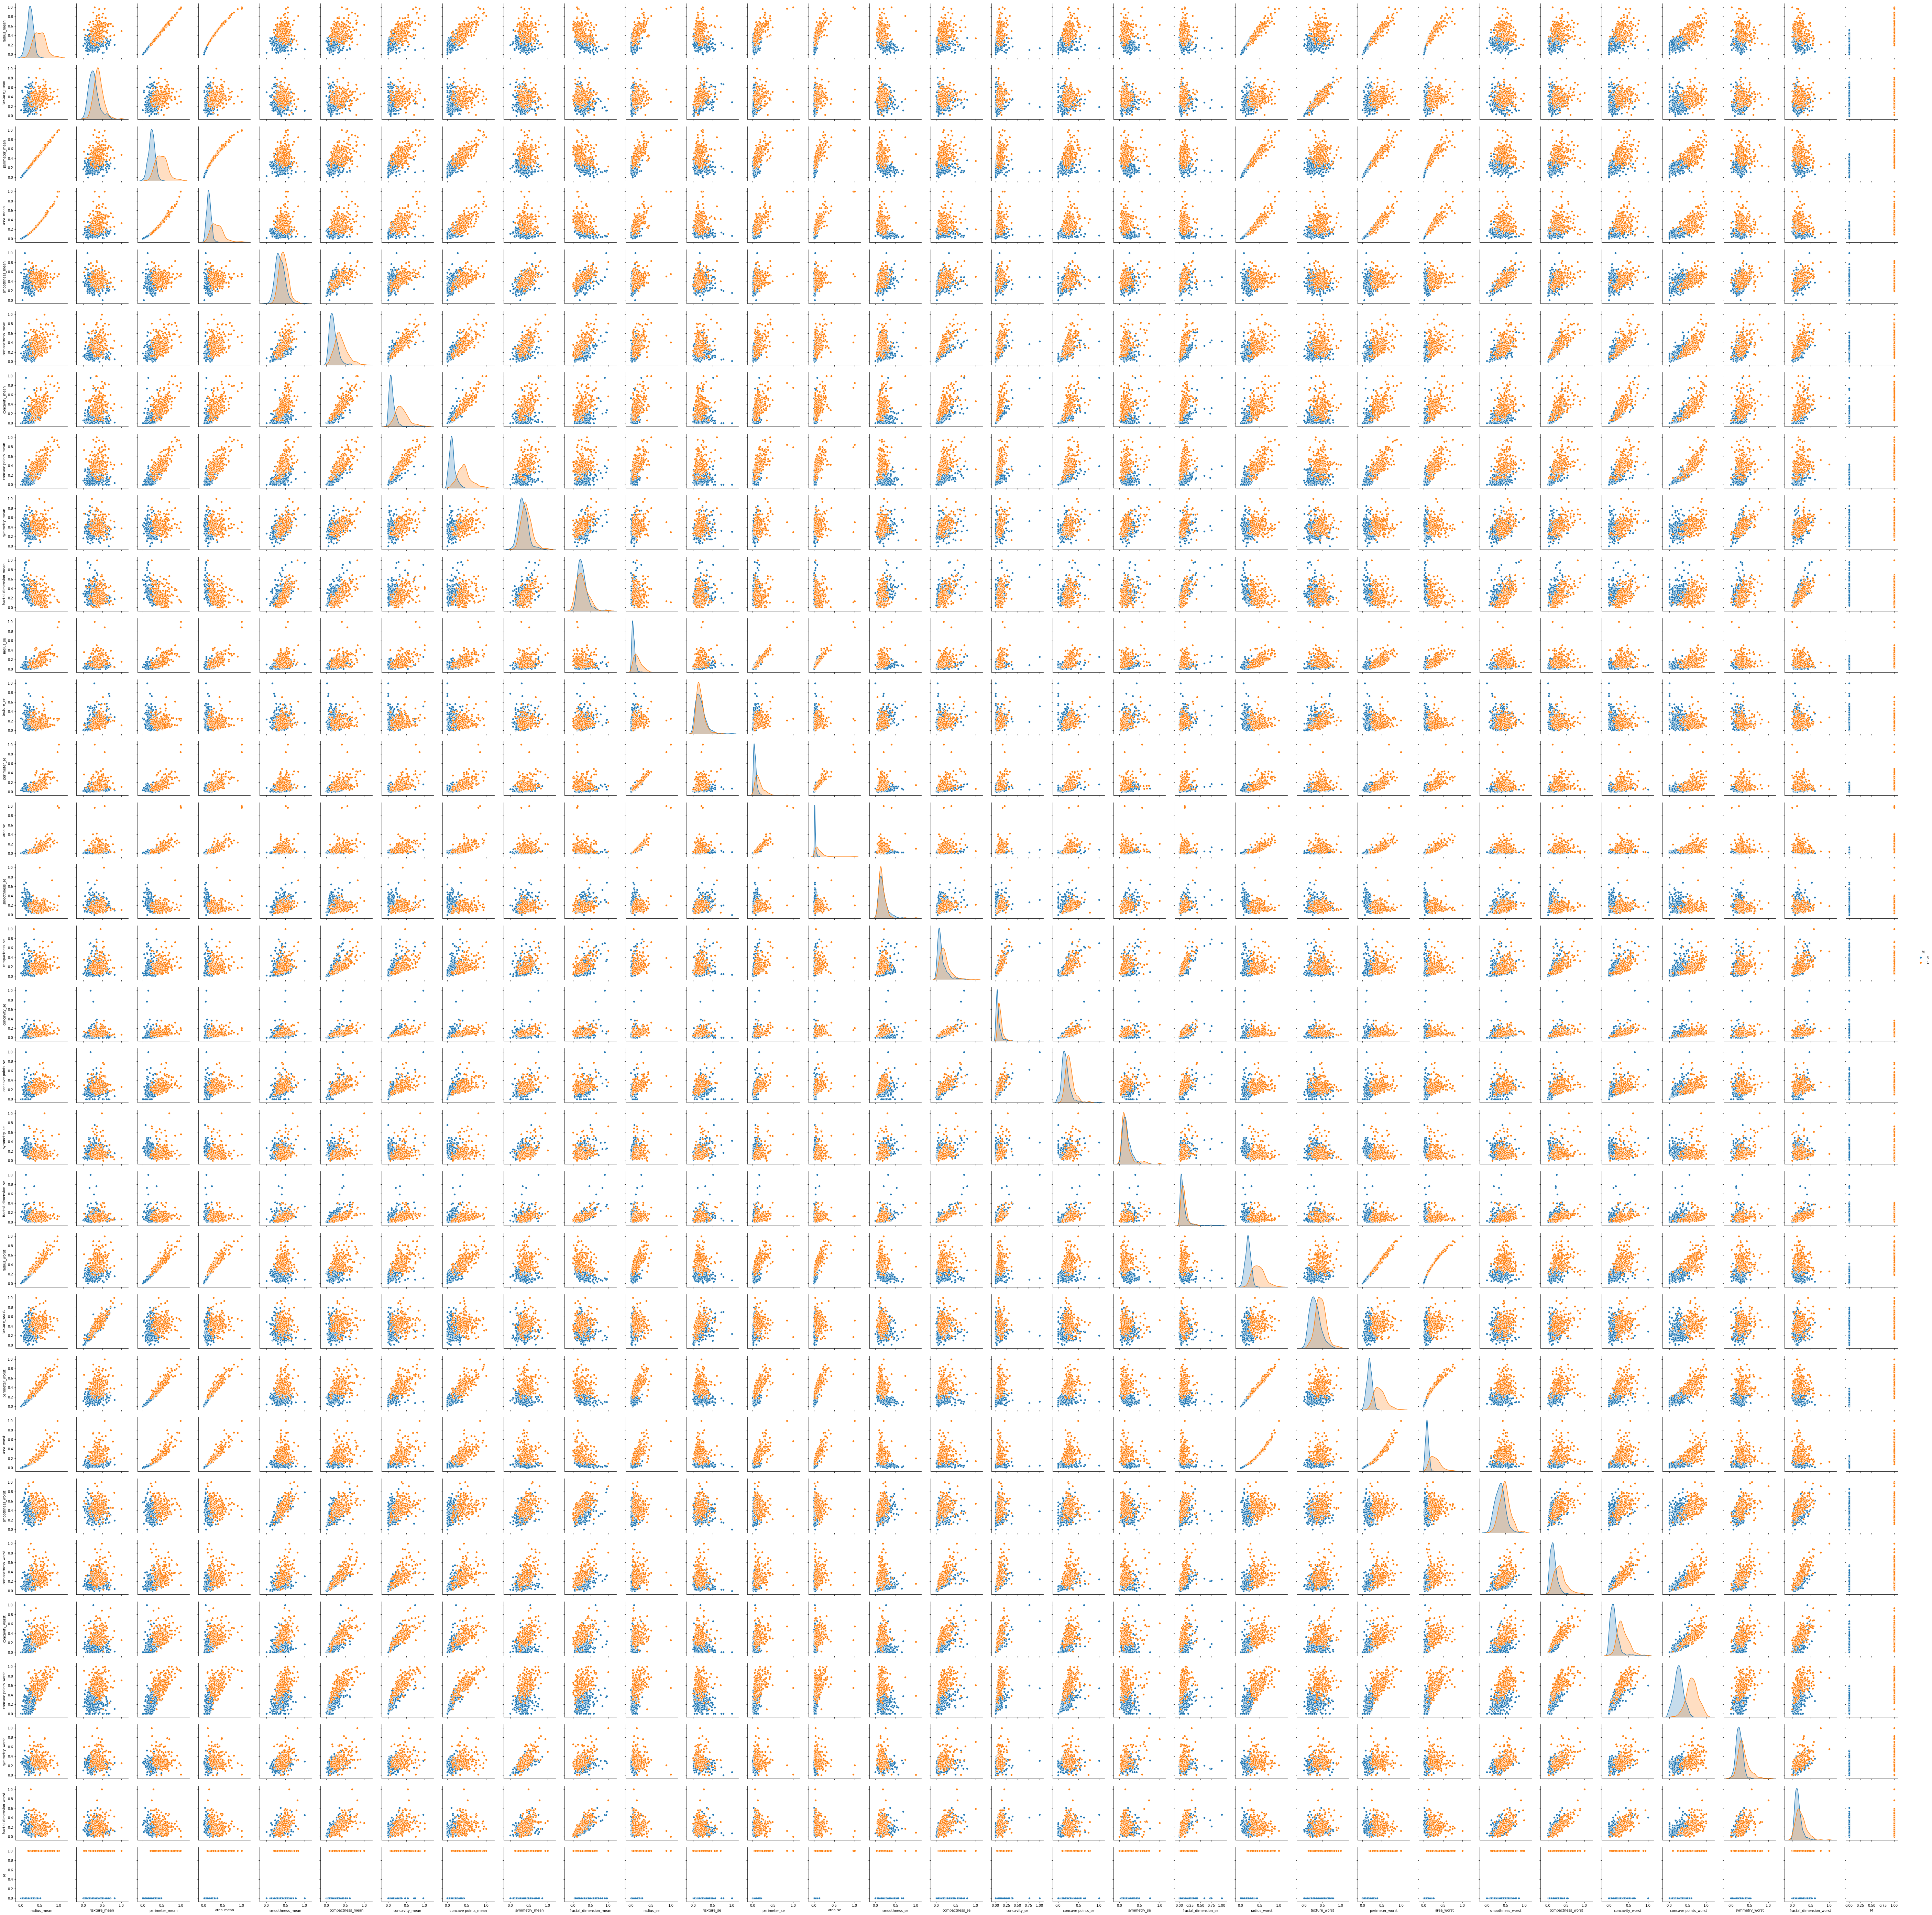

In [16]:
sns.pairplot(x,hue='M')

In [17]:
## Here we can see some features to be correlated ## We can go for dimension reduction 
## Distributions for say Mean Radii implies important features required for model building

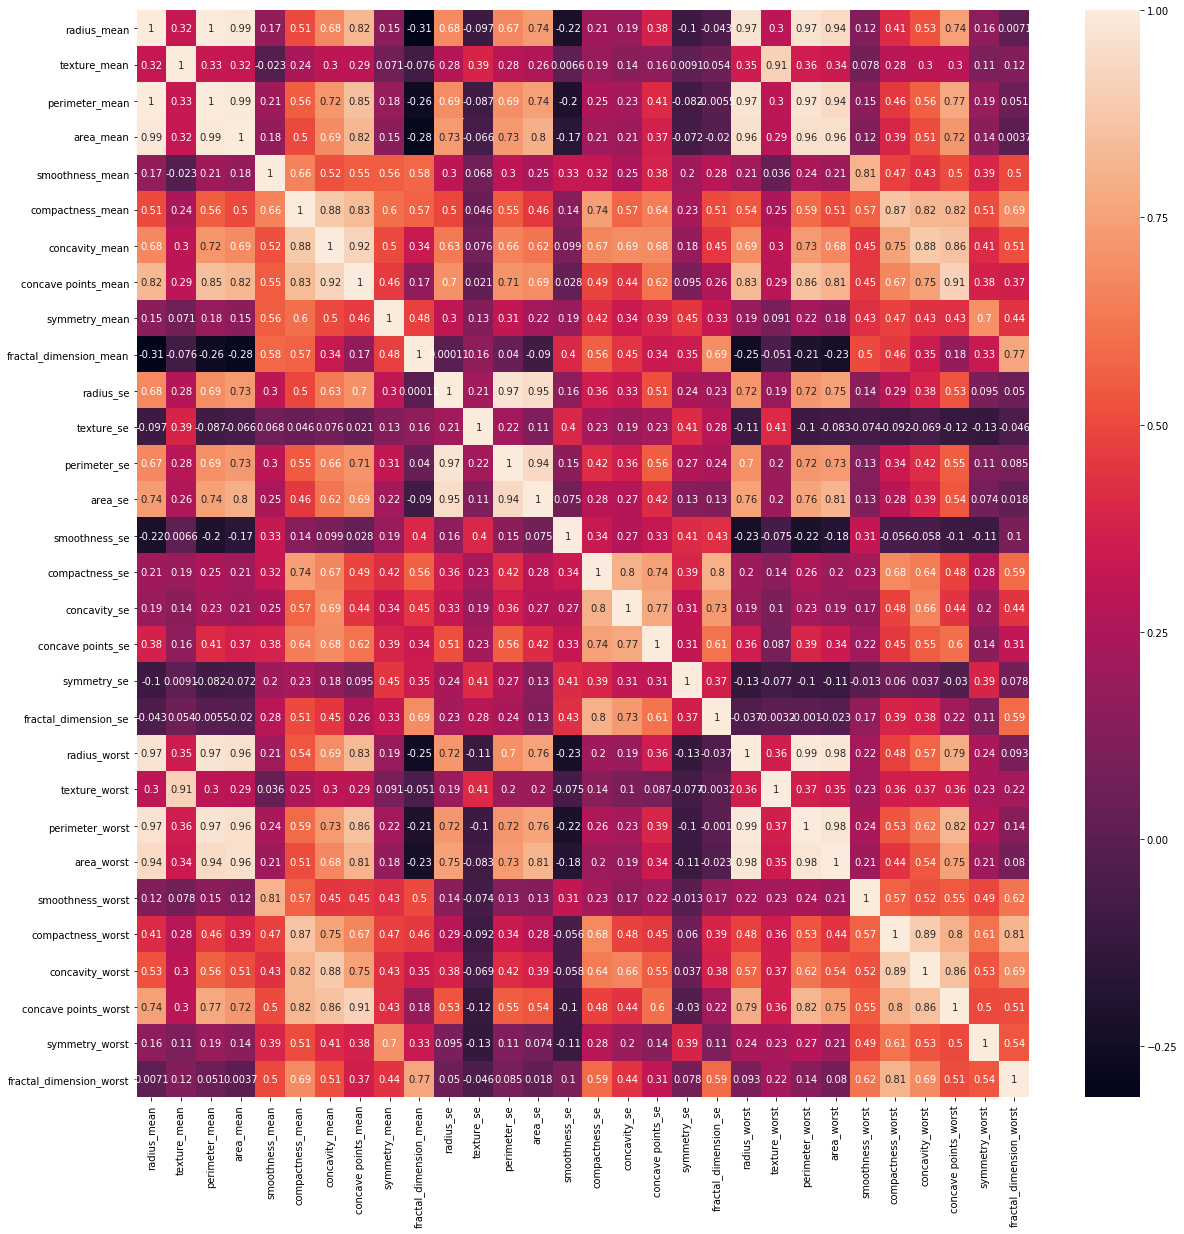

In [18]:
## Lets check correlation further with heatmaps
plt.figure(figsize=(20,20))
sns.heatmap(x.iloc[:,:-1].corr(),annot=True)

In [19]:
## Applying Principle Components for Dimension Reduction

Text(0, 0.5, 'Cumulative Explained Variance')

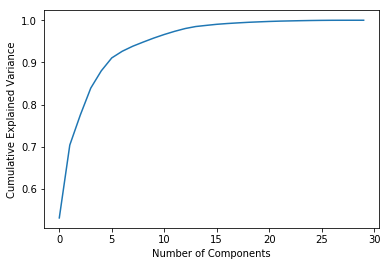

In [20]:
## Determining number of Principle Components:
from sklearn.decomposition import PCA
pca_check=PCA().fit(x.iloc[:,:-1])
plt.plot(np.cumsum(pca_check.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [22]:
## Here about 4 components explain approximately 85%  Variability in the data

## We use 6 Principle Components
np.cumsum(pca_check.explained_variance_ratio_)

## has 30 principle components in total with order of reducing importance

array([0.53097689, 0.70381179, 0.77495621, 0.8390688 , 0.87992952,
       0.91064446, 0.92645284, 0.93836755, 0.94825184, 0.95770631,
       0.96620027, 0.97378004, 0.98034642, 0.98509453, 0.98778877,
       0.99036631, 0.99220387, 0.99371658, 0.99509377, 0.99615336,
       0.99713642, 0.99792092, 0.99844898, 0.99895896, 0.99938904,
       0.99971865, 0.99990923, 0.99996514, 0.99999404, 1.        ])

In [47]:
### Reducing to 4 components
pca = PCA(4)
projected=pca.fit_transform(x.iloc[:,:-1])


In [48]:
print(projected.shape)
##  569 Instances and just 2 dimensions


(569, 4)


In [49]:
projected=pd.DataFrame(projected)

In [50]:
projected=projected.join(x.iloc[:,-1])

Text(0, 0.5, 'Principle Component 2')

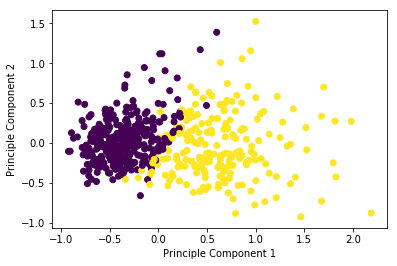

In [51]:
plt.scatter(projected.iloc[:,0],projected.iloc[:,1],c=projected.iloc[:,-1])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")


In [54]:
### Now lets Create a model # MODEL TRAINING


In [89]:
## Data Split:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(projected.iloc[:,:-1],projected.iloc[:,-1],test_size=0.3,random_state=50)

In [90]:
## Classification using Support Vector Machines
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
y_pred=svc_model.predict(X_test)

In [93]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=uint8)

In [94]:
cm=confusion_matrix(y_test,y_pred)

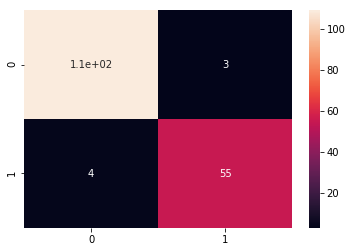

In [95]:
sns.heatmap(cm,annot=True)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       112
           1       0.95      0.93      0.94        59

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



In [97]:
### Parameter Tuning 

### Optimize the C and Gamma Parameters using Grid Search

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [99]:
grid.fit(X_train,y_train)

C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9398496240601504, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9548872180451128, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9393939393939394, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.849624060150376, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8646616541353384, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8939393939393939, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .............................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [100]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [101]:
grid_pred=grid.predict(X_test)

In [102]:
cm_new=confusion_matrix(y_test,grid_pred)

In [103]:
cm_new

array([[108,   4],
       [  2,  57]], dtype=int64)

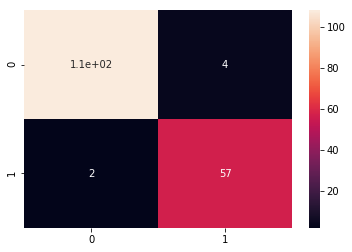

In [104]:
sns.heatmap(cm_new,annot=True)

In [88]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       140
           1       0.96      0.97      0.96        88

   micro avg       0.97      0.97      0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



In [105]:
## Type 1 error is not too bad,. Model seems reasonable

In [106]:
### Model Accuracy is 97%. We used 4 Principle Components out of 30,thereby reducing computations